In [1]:
import pandas as pd
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

# This base is a copy from the one in "Parte Económica"
df_patents = pd.read_excel('Base\patent.xlsx')
non_countries = [
    'World', 'High-income countries', 'Upper-middle-income countries', 
    'Low-income countries', 'Lower-middle-income countries'
]

df_patents = df_patents[~df_patents['Entity'].isin(non_countries)]
df_patents['Continent'] = df_patents['Code'].apply(country_to_continent)

df_patents.head()

,Entity,Year,PatenteResi,Code,Continent
0,Sri Lanka,1980,11,LKA,Asia
1,Haiti,1980,4,HTI,North America
2,Switzerland,1980,4049,CHE,Europe
3,Morocco,1980,29,MAR,Africa
4,Syrian Arab Republic,1980,6,SYR,Asia


In [2]:
continent_translation = {
    'Africa': 'África',
    'Asia': 'Asia',
    'Europe': 'Europa',
    'North America': 'América del Norte',
    'South America': 'América del Sur',
    'Oceania': 'Oceanía',
    'Antarctica': 'Antártida'
}

# Aplicar la traducción a la columna 'Continent'
df_patents['Continent'] = df_patents['Continent'].map(continent_translation)


In [3]:
df_patents_clean = df_patents.drop(columns=['Entity','Code'])

df_patents_clean = df_patents_clean.groupby(['Year','Continent'], as_index=False).mean()
df_patents_clean = df_patents_clean[df_patents_clean['Year']>1984]

df_patents_clean.head()

,Year,Continent,PatenteResi
30,1985,América del Norte,6045.090909
31,1985,América del Sur,276.888889
32,1985,Asia,17738.375000
33,1985,Europa,4255.130435
34,1985,Oceanía,853.500000


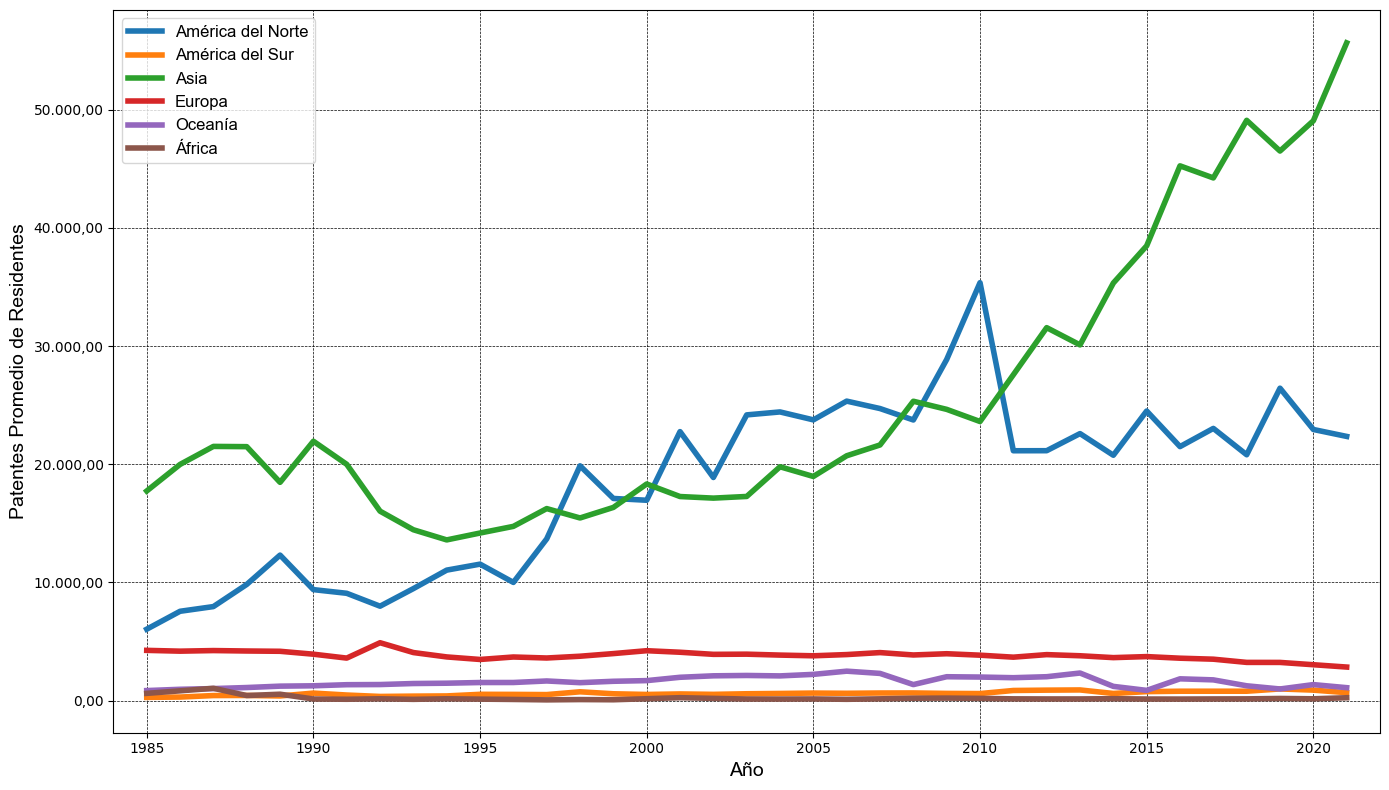

In [4]:
import matplotlib.pyplot as plt
import locale

# Configurar la localización para español latino
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')

plt.figure(figsize=(14, 8)) 

for continent in df_patents_clean['Continent'].unique():
    df_continent = df_patents_clean[df_patents_clean['Continent'] == continent]
    plt.plot(df_continent['Year'], df_continent['PatenteResi'], label=continent, lw = 4)

# Añadir etiquetas y título
plt.xlabel('Año', fontname='Arial', fontsize=14)
plt.ylabel('Patentes Promedio de Residentes', fontname='Arial', fontsize=14)
plt.xlim(1984,2022)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: locale.format_string('%.2f', x, grouping=True)))

plt.grid(linestyle='--', color='black', linewidth=0.5)

# Añadir leyenda
plt.legend(title='Continente')

plt.tight_layout() 

plt.legend(prop={'family': 'Arial', 'size': 12})

# Cambiar la fuente de todos los textos a Arial
plt.rcParams['font.family'] = 'Arial'

plt.savefig("Gráficos\Figura1.png", dpi=300)
# Mostrar el gráfico
plt.show()


United Nations, Department of Economic and Social Affairs, Population Division (2024). World Population Prospects: The 2024 Revision, custom data acquired via website.Link to source  


In [9]:
import wbdata
import pandas as pd

# countries = ['ARG', 'IRL']
# indicator = {'NY.GDP.MKTP.KD': 'GDP_constant_USD'}

# data = wbdata.get_dataframe(indicator, country=countries)

# data.reset_index(inplace=True)
# data.rename(columns={'country': 'Country', 'date': 'Year', 'GDP_constant_USD': 'GDP (constant USD)'}, inplace=True)
# data.sort_values(by=['Year', 'Country'], inplace=True)
# data.to_csv("Base\GDP_Argentina_Ireland.csv", index=False)

gdp = pd.read_csv('Base\GDP_Argentina_Ireland.csv')
gdp.head()

,Country,Year,GDP (constant USD)
0,Argentina,1960,1.507978e+11
1,Ireland,1960,2.413530e+10
2,Argentina,1961,1.589829e+11
3,Ireland,1961,2.534597e+10
4,Argentina,1962,1.576283e+11


In [25]:
pop =  pd.read_csv('Base/unpopulation_dataportal_20250127174014.txt', delimiter = '\t') 
pop = pop[['Location','Time','Value']]
pop.rename(columns = {'Location':'Country','Time':'Year'}, inplace = True)
pop.head()

,Country,Year,Value
0,Argentina,1950,17018036.5
1,Argentina,1951,17356467.0
2,Argentina,1952,17698877.5
3,Argentina,1953,18041301.5
4,Argentina,1954,18381212.5


In [39]:
df.tail()

,Country,Year,GDP (constant USD),Value,GDPpercapita
123,Ireland,2021,4.740437e+11,5028425.5,94272.791455
124,Argentina,2022,5.986030e+11,45407904.0,13182.793395
125,Ireland,2022,5.149039e+11,5110015.5,100763.671422
126,Argentina,2023,5.889595e+11,45538401.0,12933.249734
127,Ireland,2023,4.864297e+11,5196630.0,93604.835821


In [27]:
df = pd.merge(gdp, pop, on=['Year', 'Country'], how='inner')
df['GDPpercapita'] = df['GDP (constant USD)']/df['Value']

In [46]:
dffilt = df[(df['Year']== 1960) | (df['Year']== 2023)]
print(dffilt)

       Country  Year  GDP (constant USD)       Value  GDPpercapita
0    Argentina  1960        1.507978e+11  20386045.0   7397.109655
1      Ireland  1960        2.413530e+10   2827689.5   8535.344641
126  Argentina  2023        5.889595e+11  45538401.0  12933.249734
127    Ireland  2023        4.864297e+11   5196630.0  93604.835821


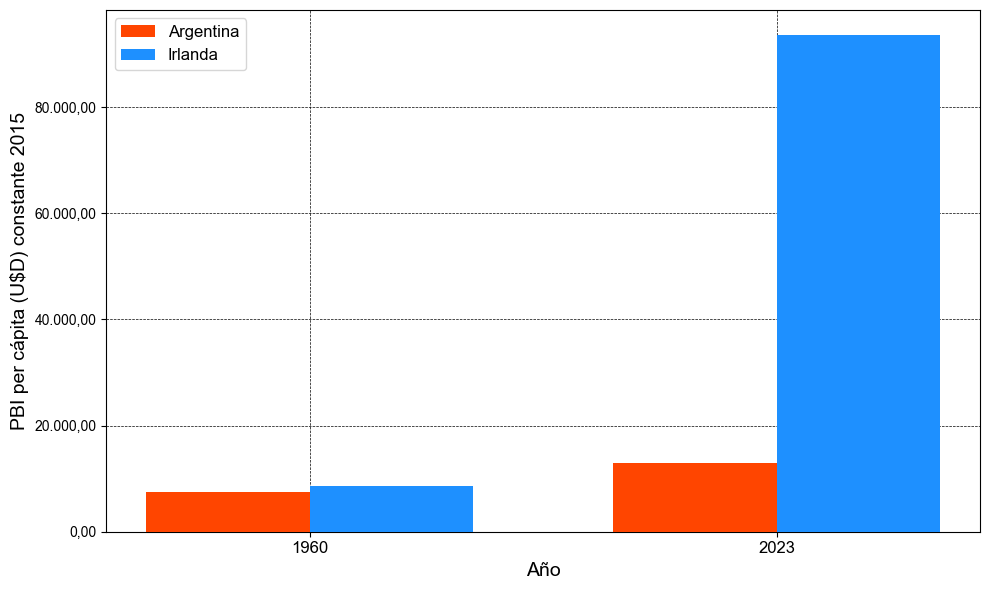

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import locale

# Configurar la localización para español latino
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')

# Datos
years = [1960, 2023]
countries = ['Argentina', 'Ireland']
colors = ['orangered', 'dodgerblue'] 

# Extraer los valores de GDP per cápita
gdp_argentina = dffilt[dffilt['Country'] == 'Argentina']['GDPpercapita'].values
gdp_ireland = dffilt[dffilt['Country'] == 'Ireland']['GDPpercapita'].values

# Posiciones de las barras
x = np.arange(len(years))  # Posiciones para los años
width = 0.35  # Ancho de las barras

# Crear el gráfico
plt.figure(figsize=(10, 6))

plt.grid(linestyle='--', color='black', linewidth=0.5, zorder=0)


# Barras para Argentina
plt.bar(x - width/2, gdp_argentina, width, label='Argentina', color=colors[0], zorder=3)

# Barras para Irlanda
plt.bar(x + width/2, gdp_ireland, width, label='Irlanda', color=colors[1], zorder=3)

# Añadir etiquetas y título
plt.xlabel('Año', fontname='Arial', fontsize=14)
plt.ylabel('PBI per cápita (U$D) constante 2015', fontname='Arial', fontsize=14)
plt.xticks(x, years, fontname='Arial', fontsize=12)  # Etiquetas del eje X (años)

# Formatear el eje Y con puntos y comas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: locale.format_string('%.2f', x, grouping=True)))

# Leyenda con fuente Arial
plt.legend(prop={'family': 'Arial', 'size': 12})

# Cambiar la fuente de todos los textos a Arial
plt.rcParams['font.family'] = 'Arial'

# Mostrar el gráfico
plt.tight_layout()

plt.savefig("Gráficos\Figura2.png", dpi=300)
plt.show()

In [98]:
# countries = ['ARG', 'IRL']
# indicators = {
#     "CC.EST": "Control de la Corrupción",
#     "RQ.EST": "Calidad Regulatoria",
#     "RL.EST": "Estado de Derecho",
# }

# data = wbdata.get_dataframe(indicators, country=countries)

# data.reset_index(inplace=True)
# data.rename(columns={'country': 'Country', 'date': 'Year', 'GDP_constant_USD': 'GDP (constant USD)'}, inplace=True)
# data.sort_values(by=['Year', 'Country'], inplace=True)
# data = data[data['Year']=='2023']
# data.to_csv("Base\Inst2023ArgIrl.csv", index=False)


df_inst = pd.read_csv('Base\Inst2023ArgIrl.csv')
df_inst.loc[df_inst['Country'] == 'Ireland', 'Country'] = 'Irlanda'
print(df_inst)

     Country  Year  Control de la Corrupción  Calidad Regulatoria  \
0  Argentina  2023                 -0.360884            -0.482535   
1    Irlanda  2023                  1.575289             1.749364   

   Estado de Derecho  
0          -0.410827  
1           1.633584  


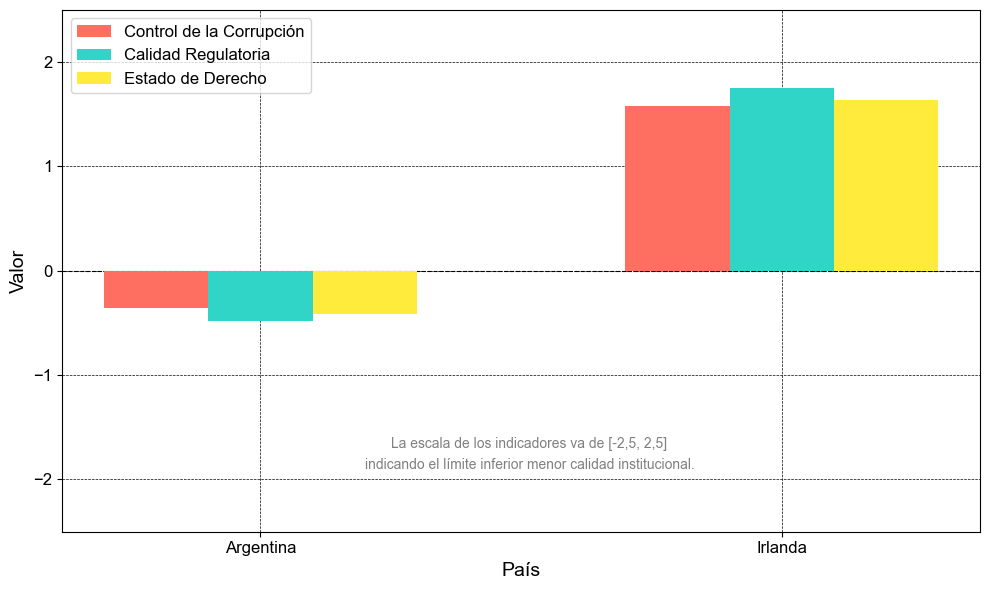

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración
categories = ['Control de la Corrupción', 'Calidad Regulatoria', 'Estado de Derecho']
colors = ['#FF6F61', '#30D5C8', '#FFEB3B']# Colores para cada categoría
countries = df_inst['Country']
x = np.arange(len(countries))  # Posiciones en el eje X
width = 0.2  # Ancho de las barras

# Crear el gráfico
plt.figure(figsize=(10, 6))

plt.grid(linestyle='--', color='black', linewidth=0.5, zorder=0)

# Dibujar las barras para cada categoría
for i, category in enumerate(categories):
    plt.bar(x + i * width, df_inst[category], width, label=category, color=colors[i],zorder=3)

# Añadir etiquetas y título
plt.xlabel('País', fontname='Arial', fontsize=14)
plt.ylabel('Valor', fontname='Arial', fontsize=14)
plt.xticks(x + width, countries, fontname='Arial', fontsize=12)  # Etiquetas del eje X
plt.ylim(-2, 2)  # Límites del eje Y
plt.yticks(fontname='Arial', fontsize=12)

# Añadir una línea horizontal en y=0 para mayor claridad
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Añadir leyenda
plt.legend(prop={'family': 'Arial', 'size': 12})

# Añadir nota sobre la escala del eje Y
plt.text(0.45, -1.7, 'La escala de los indicadores va de [-2,5, 2,5]', fontname='Arial', fontsize=10, color='gray')
plt.text(0.4, -1.9, 'indicando el límite inferior menor calidad institucional.', fontname='Arial', fontsize=10, color='gray')
plt.ylim(-2.5,2.5)

# Cambiar la fuente de todos los textos a Arial
plt.rcParams['font.family'] = 'Arial'

# Mostrar el gráfico
plt.tight_layout()

plt.savefig("Gráficos\Figura3.png", dpi=300)
plt.show()